In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [50]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [74]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [75]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [76]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [77]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [78]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [79]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [66]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [67]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [68]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [69]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

# Answer 1a

118it [00:10, 11.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


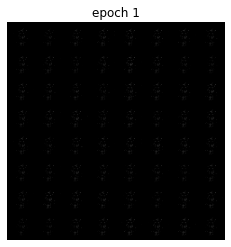

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 1 of 100
Generator loss: 5.82100439, Discriminator loss: 0.49269113


118it [00:10, 11.14it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.83it/s]

Epoch 2 of 100
Generator loss: 3.42980003, Discriminator loss: 0.76790744


118it [00:10, 11.16it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.60it/s]

Epoch 3 of 100
Generator loss: 5.70647383, Discriminator loss: 0.87219703


118it [00:10, 10.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 4 of 100
Generator loss: 7.45287037, Discriminator loss: 1.24122000


118it [00:10, 11.00it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


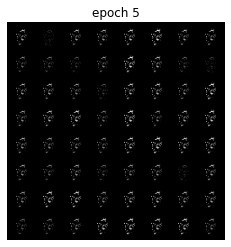

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.25it/s]

Epoch 5 of 100
Generator loss: 3.72471762, Discriminator loss: 0.69393212


118it [00:11, 10.68it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.80it/s]

Epoch 6 of 100
Generator loss: 2.16529107, Discriminator loss: 1.10560429


118it [00:10, 10.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 7 of 100
Generator loss: 2.31569099, Discriminator loss: 0.88745689


118it [00:11, 10.35it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 8 of 100
Generator loss: 2.01724553, Discriminator loss: 0.67481494


118it [00:10, 10.89it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.55it/s]

Epoch 9 of 100
Generator loss: 1.22824740, Discriminator loss: 1.20933509


118it [00:10, 11.02it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


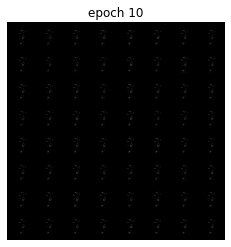

  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.99it/s]

Epoch 10 of 100
Generator loss: 1.08076048, Discriminator loss: 0.96891409


118it [00:10, 10.99it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 11 of 100
Generator loss: 1.95814168, Discriminator loss: 0.99846816


118it [00:10, 10.74it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 12 of 100
Generator loss: 1.63163078, Discriminator loss: 0.69390821


118it [00:10, 10.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 13 of 100
Generator loss: 1.65387177, Discriminator loss: 0.64296329


118it [00:10, 10.83it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 14 of 100
Generator loss: 1.93922353, Discriminator loss: 0.81707454


118it [00:10, 11.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


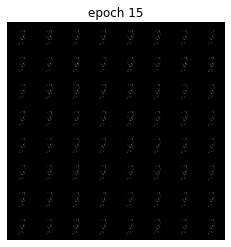

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.07it/s]

Epoch 15 of 100
Generator loss: 2.48294592, Discriminator loss: 0.58818352


118it [00:10, 11.03it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.73it/s]

Epoch 16 of 100
Generator loss: 3.15325475, Discriminator loss: 0.44586343


118it [00:10, 11.01it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.39it/s]

Epoch 17 of 100
Generator loss: 3.68228030, Discriminator loss: 0.45842102


118it [00:10, 11.00it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 18 of 100
Generator loss: 3.12684512, Discriminator loss: 0.41436285


118it [00:10, 10.96it/s]                                                                                               
  2%|█▍                                                                                | 2/117 [00:00<00:12,  9.54it/s]

Epoch 19 of 100
Generator loss: 3.07782841, Discriminator loss: 0.51548517


118it [00:10, 10.77it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


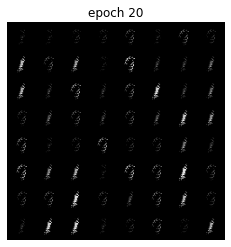

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.45it/s]

Epoch 20 of 100
Generator loss: 2.68476462, Discriminator loss: 0.46751878


118it [00:11, 10.71it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 21 of 100
Generator loss: 2.98225307, Discriminator loss: 0.42159098


118it [00:11, 10.68it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 22 of 100
Generator loss: 3.77164102, Discriminator loss: 0.27896196


118it [00:10, 11.00it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 23 of 100
Generator loss: 3.54789901, Discriminator loss: 0.28697082


118it [00:10, 10.99it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.34it/s]

Epoch 24 of 100
Generator loss: 4.19576359, Discriminator loss: 0.20857975


118it [00:10, 10.95it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


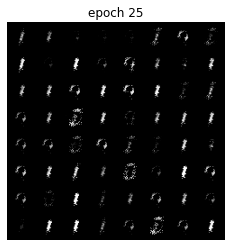

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 25 of 100
Generator loss: 3.80835152, Discriminator loss: 0.38789096


118it [00:10, 10.91it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 26 of 100
Generator loss: 2.84575224, Discriminator loss: 0.45346922


118it [00:10, 10.86it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 27 of 100
Generator loss: 3.00391698, Discriminator loss: 0.44070119


118it [00:10, 10.93it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.33it/s]

Epoch 28 of 100
Generator loss: 3.69731140, Discriminator loss: 0.31700227


118it [00:10, 10.86it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 29 of 100
Generator loss: 3.14314747, Discriminator loss: 0.43512088


118it [00:10, 10.78it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


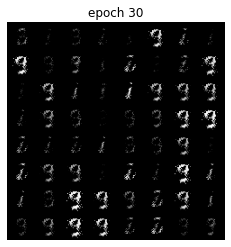

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.90it/s]

Epoch 30 of 100
Generator loss: 3.37993312, Discriminator loss: 0.42103454


118it [00:10, 10.92it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.53it/s]

Epoch 31 of 100
Generator loss: 3.67274404, Discriminator loss: 0.40394506


118it [00:10, 10.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.90it/s]

Epoch 32 of 100
Generator loss: 2.95958805, Discriminator loss: 0.45201865


118it [00:11, 10.67it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 33 of 100
Generator loss: 2.80684042, Discriminator loss: 0.46564856


118it [00:10, 10.89it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 34 of 100
Generator loss: 2.86483550, Discriminator loss: 0.62522972


118it [00:10, 10.86it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


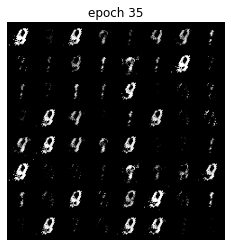

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 35 of 100
Generator loss: 2.45312285, Discriminator loss: 0.56149536


118it [00:11, 10.39it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.37it/s]

Epoch 36 of 100
Generator loss: 2.80985737, Discriminator loss: 0.45249498


118it [00:10, 10.81it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.82it/s]

Epoch 37 of 100
Generator loss: 2.82380438, Discriminator loss: 0.56522977


118it [00:10, 10.83it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 38 of 100
Generator loss: 2.44835806, Discriminator loss: 0.60445672


118it [00:10, 10.84it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.83it/s]

Epoch 39 of 100
Generator loss: 2.64969206, Discriminator loss: 0.51778835


118it [00:10, 10.84it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


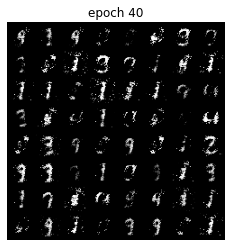

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 40 of 100
Generator loss: 2.74962091, Discriminator loss: 0.42780429


118it [00:10, 10.82it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 41 of 100
Generator loss: 3.10934687, Discriminator loss: 0.42612711


118it [00:10, 10.75it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 42 of 100
Generator loss: 3.39428854, Discriminator loss: 0.36074799


118it [00:10, 10.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 43 of 100
Generator loss: 3.30001259, Discriminator loss: 0.46797794


118it [00:10, 10.74it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 44 of 100
Generator loss: 2.77465057, Discriminator loss: 0.53619319


118it [00:11, 10.71it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


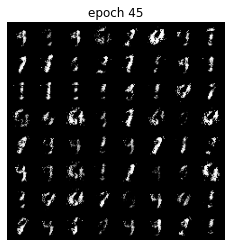

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 45 of 100
Generator loss: 2.82401919, Discriminator loss: 0.48696053


118it [00:11, 10.67it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.05it/s]

Epoch 46 of 100
Generator loss: 2.84747076, Discriminator loss: 0.45820782


118it [00:11, 10.71it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.12it/s]

Epoch 47 of 100
Generator loss: 2.90147567, Discriminator loss: 0.43096533


118it [00:11, 10.57it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.46it/s]

Epoch 48 of 100
Generator loss: 2.93391895, Discriminator loss: 0.51269209


118it [00:11, 10.69it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 49 of 100
Generator loss: 2.80346751, Discriminator loss: 0.51655078


118it [00:11, 10.65it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


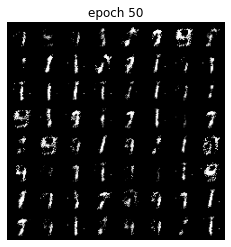

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 50 of 100
Generator loss: 2.80411625, Discriminator loss: 0.45616370


118it [00:11, 10.61it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 51 of 100
Generator loss: 2.73556852, Discriminator loss: 0.50086218


118it [00:11, 10.47it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:18,  6.25it/s]

Epoch 52 of 100
Generator loss: 3.09970117, Discriminator loss: 0.45073155


118it [00:11, 10.61it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.25it/s]

Epoch 53 of 100
Generator loss: 2.80602312, Discriminator loss: 0.45289695


118it [00:11, 10.63it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.35it/s]

Epoch 54 of 100
Generator loss: 2.92378664, Discriminator loss: 0.46120891


118it [00:11, 10.56it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


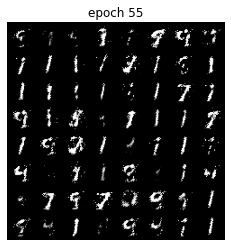

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 55 of 100
Generator loss: 2.73421884, Discriminator loss: 0.51293766


118it [00:11, 10.11it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 56 of 100
Generator loss: 2.49360371, Discriminator loss: 0.53675115


118it [00:11, 10.45it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.29it/s]

Epoch 57 of 100
Generator loss: 2.77722359, Discriminator loss: 0.50851941


118it [00:11, 10.46it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 58 of 100
Generator loss: 2.64091229, Discriminator loss: 0.52427447


118it [00:11, 10.17it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 59 of 100
Generator loss: 2.79820871, Discriminator loss: 0.50826812


118it [00:11, 10.51it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


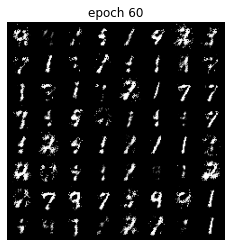

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 60 of 100
Generator loss: 2.43925571, Discriminator loss: 0.58484524


118it [00:11, 10.48it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.37it/s]

Epoch 61 of 100
Generator loss: 2.43766475, Discriminator loss: 0.57599056


118it [00:11, 10.48it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 62 of 100
Generator loss: 2.45042491, Discriminator loss: 0.57663602


118it [00:11, 10.38it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 63 of 100
Generator loss: 2.38141870, Discriminator loss: 0.60581642


118it [00:11, 10.45it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.02it/s]

Epoch 64 of 100
Generator loss: 2.41413975, Discriminator loss: 0.56580865


118it [00:11, 10.37it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


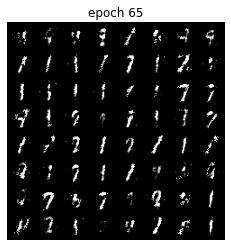

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 65 of 100
Generator loss: 2.39742827, Discriminator loss: 0.55890793


118it [00:11, 10.50it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 66 of 100
Generator loss: 2.32408810, Discriminator loss: 0.61794657


118it [00:11, 10.45it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 67 of 100
Generator loss: 2.35223913, Discriminator loss: 0.64068276


118it [00:11, 10.39it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 68 of 100
Generator loss: 2.18809366, Discriminator loss: 0.63441932


118it [00:11, 10.38it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.13it/s]

Epoch 69 of 100
Generator loss: 2.26416683, Discriminator loss: 0.64401042


118it [00:11, 10.41it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


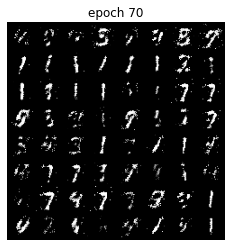

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.11it/s]

Epoch 70 of 100
Generator loss: 2.22458577, Discriminator loss: 0.65805906


118it [00:11, 10.08it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.71it/s]

Epoch 71 of 100
Generator loss: 2.28912687, Discriminator loss: 0.64176553


118it [00:11, 10.00it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.86it/s]

Epoch 72 of 100
Generator loss: 2.25027919, Discriminator loss: 0.66157573


118it [00:11, 10.22it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.29it/s]

Epoch 73 of 100
Generator loss: 2.16677070, Discriminator loss: 0.70911634


118it [00:11, 10.32it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.54it/s]

Epoch 74 of 100
Generator loss: 2.43411803, Discriminator loss: 0.65281236


118it [00:11, 10.39it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


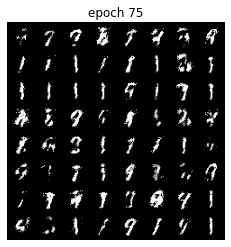

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.12it/s]

Epoch 75 of 100
Generator loss: 2.38654804, Discriminator loss: 0.61930263


118it [00:11, 10.31it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.11it/s]

Epoch 76 of 100
Generator loss: 2.30475640, Discriminator loss: 0.60605705


118it [00:11, 10.15it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 77 of 100
Generator loss: 2.27789211, Discriminator loss: 0.67188972


118it [00:12,  9.48it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 78 of 100
Generator loss: 2.35062242, Discriminator loss: 0.61157155


118it [00:11,  9.91it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.43it/s]

Epoch 79 of 100
Generator loss: 2.41081309, Discriminator loss: 0.61692148


118it [00:11, 10.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


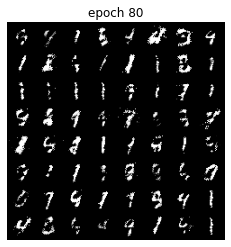

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.53it/s]

Epoch 80 of 100
Generator loss: 2.13386512, Discriminator loss: 0.67088711


118it [00:11,  9.87it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.60it/s]

Epoch 81 of 100
Generator loss: 2.19267535, Discriminator loss: 0.69238675


118it [00:12,  9.44it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  6.92it/s]

Epoch 82 of 100
Generator loss: 2.11497569, Discriminator loss: 0.71444911


118it [00:13,  9.06it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.57it/s]

Epoch 83 of 100
Generator loss: 1.98522699, Discriminator loss: 0.73517370


118it [00:12,  9.31it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 84 of 100
Generator loss: 2.15590501, Discriminator loss: 0.70191967


118it [00:12,  9.51it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


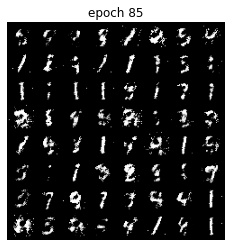

  1%|▋                                                                                 | 1/117 [00:00<00:16,  6.91it/s]

Epoch 85 of 100
Generator loss: 2.12769842, Discriminator loss: 0.71636790


118it [00:11,  9.94it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 86 of 100
Generator loss: 1.97906399, Discriminator loss: 0.72736931


118it [00:11,  9.95it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.90it/s]

Epoch 87 of 100
Generator loss: 2.02373505, Discriminator loss: 0.74579316


118it [00:12,  9.72it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.45it/s]

Epoch 88 of 100
Generator loss: 1.95433462, Discriminator loss: 0.76515484


118it [00:11, 10.17it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.41it/s]

Epoch 89 of 100
Generator loss: 1.96365154, Discriminator loss: 0.76865488


118it [00:11, 10.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


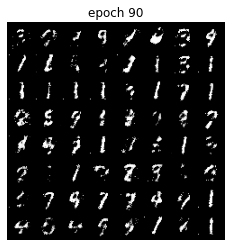

  1%|▋                                                                                 | 1/117 [00:00<00:16,  6.92it/s]

Epoch 90 of 100
Generator loss: 1.90761983, Discriminator loss: 0.76816732


118it [00:11, 10.06it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.68it/s]

Epoch 91 of 100
Generator loss: 1.95565546, Discriminator loss: 0.78642279


118it [00:11, 10.16it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:17,  6.61it/s]

Epoch 92 of 100
Generator loss: 2.01246643, Discriminator loss: 0.75710028


118it [00:11, 10.18it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.24it/s]

Epoch 93 of 100
Generator loss: 1.98498762, Discriminator loss: 0.74911398


118it [00:11, 10.01it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.11it/s]

Epoch 94 of 100
Generator loss: 1.95464289, Discriminator loss: 0.77764517


 71%|█████████████████████████████████████████████████████████▍                       | 83/117 [00:08<00:03,  9.71it/s]


KeyboardInterrupt: 

In [71]:
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        image, _ = data
        image = image.to(device)
        b_size = len(image)
            
        # run discriminator for  steps
        for step in range(k):
            fakes = generator(create_noise(b_size, nz)).detach()
            reals = image
            
            # train discriminator
            #loss_d += train_discriminator(optim_d, data_real, data_fake)
            
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            
            optim_d.zero_grad()
            
            output_real = discriminator(reals)
            loss_real = criterion(output_real, real_label)
            
            output_fake = discriminator(fakes)
            loss_fake = criterion(output_fake, fake_label)
            
            loss_real.backward()
            loss_fake.backward()
            
            optim_d.step()
            
            loss_d += loss_real + loss_fake
        
        data_fake = generator(create_noise(b_size, nz))
        # train generator
        
        output = discriminator(fakes)
        
        optim_g.zero_grad()
        
        output = discriminator(data_fake)
        loss_g_current = criterion(output, real_label)
        loss_g_current.backward()
        
        optim_g.step()
        
        loss_g += loss_g_current
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

118it [00:10, 10.85it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


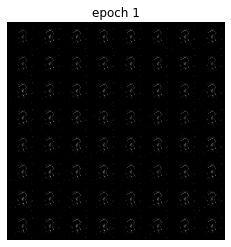

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.55it/s]

Epoch 1 of 100
Generator loss: 1.32252479, Discriminator loss: 0.94038153


118it [00:10, 10.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.03it/s]

Epoch 2 of 100
Generator loss: 1.64557517, Discriminator loss: 1.28816032


118it [00:11, 10.34it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.32it/s]

Epoch 3 of 100
Generator loss: 4.94019032, Discriminator loss: 0.86888385


118it [00:11, 10.69it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 4 of 100
Generator loss: 2.88490629, Discriminator loss: 0.76921719


118it [00:10, 10.89it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


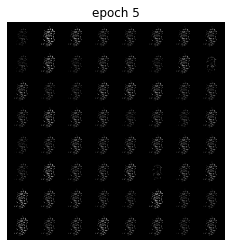

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.90it/s]

Epoch 5 of 100
Generator loss: 2.55805945, Discriminator loss: 0.76125431


118it [00:10, 10.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.24it/s]

Epoch 6 of 100
Generator loss: 3.09955287, Discriminator loss: 0.97403246


118it [00:10, 10.77it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.80it/s]

Epoch 7 of 100
Generator loss: 2.02497292, Discriminator loss: 1.34572816


118it [00:10, 10.81it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.46it/s]

Epoch 8 of 100
Generator loss: 2.02712560, Discriminator loss: 0.84548581


118it [00:10, 10.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 9 of 100
Generator loss: 1.21518517, Discriminator loss: 1.19558978


118it [00:10, 10.75it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


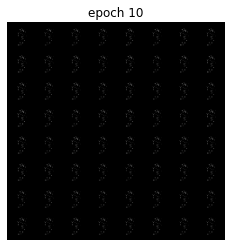

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.16it/s]

Epoch 10 of 100
Generator loss: 1.20536590, Discriminator loss: 1.12966561


118it [00:11, 10.64it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.25it/s]

Epoch 11 of 100
Generator loss: 1.92685628, Discriminator loss: 1.01802850


118it [00:10, 10.81it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 12 of 100
Generator loss: 1.64539742, Discriminator loss: 1.17487395


118it [00:10, 10.93it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.41it/s]

Epoch 13 of 100
Generator loss: 1.43315387, Discriminator loss: 1.00580919


118it [00:10, 10.94it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.71it/s]

Epoch 14 of 100
Generator loss: 2.16521096, Discriminator loss: 0.97727191


118it [00:11, 10.63it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


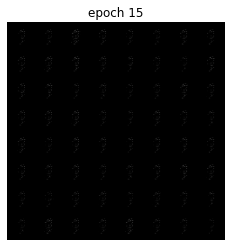

  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.73it/s]

Epoch 15 of 100
Generator loss: 1.71367157, Discriminator loss: 0.91634607


118it [00:10, 11.46it/s]                                                                                               
  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

Epoch 16 of 100
Generator loss: 1.73138475, Discriminator loss: 0.77610224


118it [00:10, 11.28it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 17 of 100
Generator loss: 2.45007706, Discriminator loss: 0.63857383


118it [00:10, 11.29it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.94it/s]

Epoch 18 of 100
Generator loss: 3.31387520, Discriminator loss: 0.56751209


118it [00:10, 11.38it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 19 of 100
Generator loss: 2.79546595, Discriminator loss: 0.48327774


118it [00:10, 11.42it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


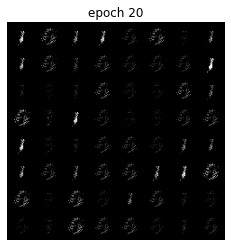

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.80it/s]

Epoch 20 of 100
Generator loss: 3.18969631, Discriminator loss: 0.32330421


118it [00:10, 11.40it/s]                                                                                               
  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

Epoch 21 of 100
Generator loss: 3.87541485, Discriminator loss: 0.30661076


118it [00:10, 11.46it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.59it/s]

Epoch 22 of 100
Generator loss: 3.41324425, Discriminator loss: 0.53280801


118it [00:10, 11.38it/s]                                                                                               
  2%|█▍                                                                                | 2/117 [00:00<00:11, 10.13it/s]

Epoch 23 of 100
Generator loss: 3.33321118, Discriminator loss: 0.50427198


118it [00:10, 11.43it/s]                                                                                               
  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

Epoch 24 of 100
Generator loss: 2.98920894, Discriminator loss: 0.55154598


118it [00:10, 11.39it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


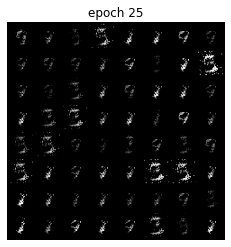

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 25 of 100
Generator loss: 2.60579109, Discriminator loss: 0.64106214


118it [00:10, 11.31it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 26 of 100
Generator loss: 2.92600656, Discriminator loss: 0.47411174


118it [00:10, 11.23it/s]                                                                                               
  2%|█▍                                                                                | 2/117 [00:00<00:11,  9.69it/s]

Epoch 27 of 100
Generator loss: 2.89989638, Discriminator loss: 0.55092865


118it [00:10, 11.31it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 28 of 100
Generator loss: 3.06764221, Discriminator loss: 0.49115339


118it [00:10, 11.18it/s]                                                                                               
  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

Epoch 29 of 100
Generator loss: 3.27674747, Discriminator loss: 0.45048115


118it [00:10, 11.26it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


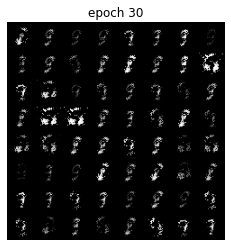

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.62it/s]

Epoch 30 of 100
Generator loss: 3.17047310, Discriminator loss: 0.48083386


118it [00:10, 11.16it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 31 of 100
Generator loss: 2.95548725, Discriminator loss: 0.50179505


118it [00:10, 11.23it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.55it/s]

Epoch 32 of 100
Generator loss: 3.45914507, Discriminator loss: 0.38436142


118it [00:10, 10.86it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.93it/s]

Epoch 33 of 100
Generator loss: 3.19389510, Discriminator loss: 0.50400817


118it [00:10, 11.15it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 34 of 100
Generator loss: 2.84097695, Discriminator loss: 0.62827623


118it [00:11, 10.61it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


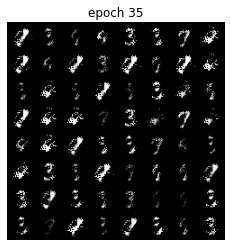

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 35 of 100
Generator loss: 2.59359264, Discriminator loss: 0.61208087


118it [00:10, 10.82it/s]                                                                                               
  2%|█▍                                                                                | 2/117 [00:00<00:11,  9.93it/s]

Epoch 36 of 100
Generator loss: 2.55681992, Discriminator loss: 0.63413054


118it [00:10, 11.15it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.73it/s]

Epoch 37 of 100
Generator loss: 2.41438341, Discriminator loss: 0.67239368


118it [00:10, 11.12it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 38 of 100
Generator loss: 2.89573979, Discriminator loss: 0.47504196


118it [00:10, 11.07it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 39 of 100
Generator loss: 2.99648833, Discriminator loss: 0.50771558


118it [00:10, 10.89it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


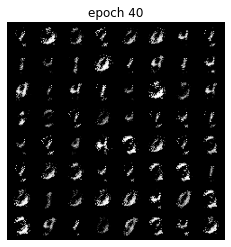

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 40 of 100
Generator loss: 2.98633647, Discriminator loss: 0.57803476


118it [00:10, 11.03it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 41 of 100
Generator loss: 2.70228767, Discriminator loss: 0.54281676


118it [00:11, 10.47it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.80it/s]

Epoch 42 of 100
Generator loss: 2.75286150, Discriminator loss: 0.52382398


118it [00:11, 10.47it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.74it/s]

Epoch 43 of 100
Generator loss: 2.82445931, Discriminator loss: 0.56412560


118it [00:10, 10.90it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 44 of 100
Generator loss: 2.94845390, Discriminator loss: 0.48887607


118it [00:10, 10.88it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


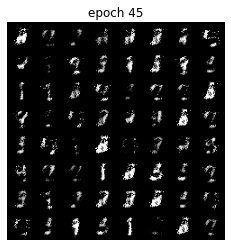

  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.93it/s]

Epoch 45 of 100
Generator loss: 3.06129169, Discriminator loss: 0.54192036


118it [00:10, 10.86it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 46 of 100
Generator loss: 2.51385593, Discriminator loss: 0.65780950


118it [00:10, 10.91it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.37it/s]

Epoch 47 of 100
Generator loss: 2.88059092, Discriminator loss: 0.51338130


118it [00:10, 10.98it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 48 of 100
Generator loss: 3.19042420, Discriminator loss: 0.48481512


118it [00:10, 10.95it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 49 of 100
Generator loss: 3.17417812, Discriminator loss: 0.50388229


118it [00:10, 10.94it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


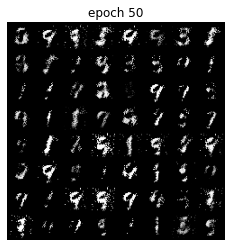

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 50 of 100
Generator loss: 3.05715823, Discriminator loss: 0.53461921


118it [00:10, 10.87it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.55it/s]

Epoch 51 of 100
Generator loss: 2.60199451, Discriminator loss: 0.59968168


118it [00:11, 10.63it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.65it/s]

Epoch 52 of 100
Generator loss: 2.55246162, Discriminator loss: 0.59952623


118it [00:10, 10.84it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 53 of 100
Generator loss: 2.73857570, Discriminator loss: 0.55987340


118it [00:10, 10.82it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.45it/s]

Epoch 54 of 100
Generator loss: 2.70928884, Discriminator loss: 0.56771779


118it [00:10, 10.85it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


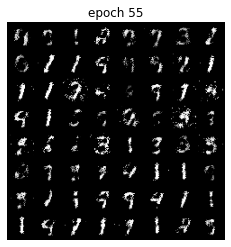

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.03it/s]

Epoch 55 of 100
Generator loss: 2.87073231, Discriminator loss: 0.52253473


118it [00:10, 10.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 56 of 100
Generator loss: 2.89682531, Discriminator loss: 0.56690383


118it [00:10, 10.78it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 57 of 100
Generator loss: 2.92003059, Discriminator loss: 0.57374102


118it [00:10, 10.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.83it/s]

Epoch 58 of 100
Generator loss: 2.73506594, Discriminator loss: 0.59316218


118it [00:10, 10.74it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 59 of 100
Generator loss: 2.68148422, Discriminator loss: 0.56873763


118it [00:10, 10.75it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


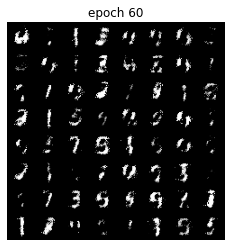

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 60 of 100
Generator loss: 2.75007868, Discriminator loss: 0.58989936


118it [00:11, 10.71it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.11it/s]

Epoch 61 of 100
Generator loss: 2.72424936, Discriminator loss: 0.57398909


118it [00:11, 10.70it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 62 of 100
Generator loss: 2.98054171, Discriminator loss: 0.49057201


118it [00:11, 10.53it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 63 of 100
Generator loss: 2.76710844, Discriminator loss: 0.55910885


118it [00:11, 10.66it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 64 of 100
Generator loss: 2.83884192, Discriminator loss: 0.54347682


118it [00:11, 10.70it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


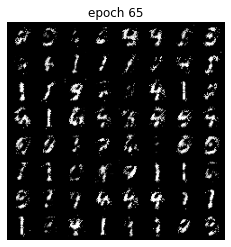

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.55it/s]

Epoch 65 of 100
Generator loss: 2.77838802, Discriminator loss: 0.59354979


118it [00:11, 10.70it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 66 of 100
Generator loss: 2.64711666, Discriminator loss: 0.62244809


118it [00:12,  9.57it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 67 of 100
Generator loss: 2.71747589, Discriminator loss: 0.59909189


118it [00:11, 10.64it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 68 of 100
Generator loss: 2.75379133, Discriminator loss: 0.55940104


118it [00:10, 10.78it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.20it/s]

Epoch 69 of 100
Generator loss: 2.59343123, Discriminator loss: 0.58447528


118it [00:11, 10.51it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


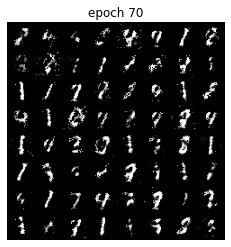

  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 70 of 100
Generator loss: 2.67647624, Discriminator loss: 0.62502718


118it [00:10, 10.82it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.27it/s]

Epoch 71 of 100
Generator loss: 2.37594676, Discriminator loss: 0.70355427


118it [00:10, 10.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.60it/s]

Epoch 72 of 100
Generator loss: 2.45783257, Discriminator loss: 0.64891338


118it [00:11, 10.54it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 73 of 100
Generator loss: 2.36693597, Discriminator loss: 0.65348303


118it [00:11, 10.70it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 74 of 100
Generator loss: 2.51408696, Discriminator loss: 0.62852114


118it [00:10, 10.75it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


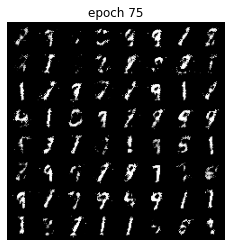

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.55it/s]

Epoch 75 of 100
Generator loss: 2.49962068, Discriminator loss: 0.65477449


118it [00:10, 10.77it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 76 of 100
Generator loss: 2.45346189, Discriminator loss: 0.60596740


118it [00:10, 10.76it/s]                                                                                               
  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

Epoch 77 of 100
Generator loss: 2.43890429, Discriminator loss: 0.64053380


118it [00:11, 10.70it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 78 of 100
Generator loss: 2.49103332, Discriminator loss: 0.66100454


118it [00:10, 10.79it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 79 of 100
Generator loss: 2.48249769, Discriminator loss: 0.66501534


118it [00:10, 10.75it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


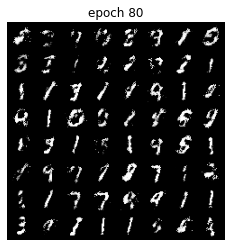

  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.93it/s]

Epoch 80 of 100
Generator loss: 2.52388954, Discriminator loss: 0.65855777


118it [00:11, 10.65it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 81 of 100
Generator loss: 2.35644484, Discriminator loss: 0.67774206


118it [00:11, 10.62it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.83it/s]

Epoch 82 of 100
Generator loss: 2.35538077, Discriminator loss: 0.63744408


118it [00:11, 10.69it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.29it/s]

Epoch 83 of 100
Generator loss: 2.35894203, Discriminator loss: 0.65001643


118it [00:10, 10.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.46it/s]

Epoch 84 of 100
Generator loss: 2.41562200, Discriminator loss: 0.67033440


118it [00:10, 10.74it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


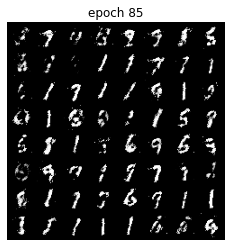

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.12it/s]

Epoch 85 of 100
Generator loss: 2.38401508, Discriminator loss: 0.69631523


118it [00:11, 10.55it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 86 of 100
Generator loss: 2.24063396, Discriminator loss: 0.69969231


118it [00:11, 10.33it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.54it/s]

Epoch 87 of 100
Generator loss: 2.23275518, Discriminator loss: 0.73806584


118it [00:11, 10.49it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 88 of 100
Generator loss: 2.24478793, Discriminator loss: 0.73212302


118it [00:11, 10.26it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.60it/s]

Epoch 89 of 100
Generator loss: 2.25422955, Discriminator loss: 0.68034494


118it [00:11, 10.50it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


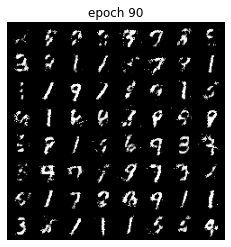

  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.74it/s]

Epoch 90 of 100
Generator loss: 2.06773758, Discriminator loss: 0.75078547


118it [00:11, 10.64it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 91 of 100
Generator loss: 2.02587223, Discriminator loss: 0.78497130


118it [00:11, 10.61it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 92 of 100
Generator loss: 1.99310458, Discriminator loss: 0.78575730


118it [00:11, 10.63it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.80it/s]

Epoch 93 of 100
Generator loss: 1.99469626, Discriminator loss: 0.77282506


118it [00:11, 10.52it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 94 of 100
Generator loss: 2.07759190, Discriminator loss: 0.76791215


118it [00:11, 10.60it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


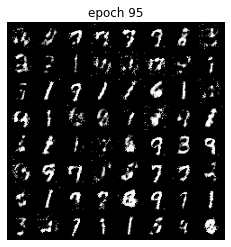

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.80it/s]

Epoch 95 of 100
Generator loss: 2.12209296, Discriminator loss: 0.79766595


118it [00:11, 10.56it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 96 of 100
Generator loss: 2.08171201, Discriminator loss: 0.76347500


118it [00:11, 10.60it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.20it/s]

Epoch 97 of 100
Generator loss: 2.15812254, Discriminator loss: 0.75981230


118it [00:11, 10.65it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 98 of 100
Generator loss: 2.06595755, Discriminator loss: 0.79194874


118it [00:11, 10.50it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 99 of 100
Generator loss: 1.97567201, Discriminator loss: 0.77487218


118it [00:13,  8.70it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


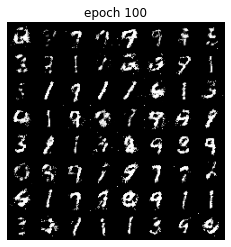

Epoch 100 of 100
Generator loss: 2.14364886, Discriminator loss: 0.73919207


In [38]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(true_label, output)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    
    return criterion(true_label, output)
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        image, _ = data
        image = image.to(device)
        b_size = len(image)
            
        # run discriminator for  steps
        for step in range(k):
            fakes = generator(create_noise(b_size, nz)).detach()
            reals = image
            
            # train discriminator
            #loss_d += train_discriminator(optim_d, data_real, data_fake)
            
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            
            optim_d.zero_grad()
            
            output_real = discriminator(reals)
            loss_real = criterion(output_real, real_label)
            
            output_fake = discriminator(fakes)
            loss_fake = criterion(output_fake, fake_label)
            
            loss_real.backward()
            loss_fake.backward()
            
            optim_d.step()
            
            loss_d += loss_real + loss_fake
        
        data_fake = generator(create_noise(b_size, nz))
        # train generator
        
        output = discriminator(fakes)
        
        optim_g.zero_grad()
        
        output = discriminator(data_fake)
        loss_g_current = criterion(output, real_label)
        loss_g_current.backward()
        
        optim_g.step()
        
        loss_g += loss_g_current
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [39]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [40]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

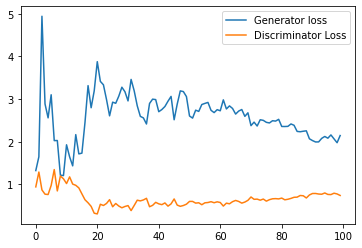

In [41]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/lossYG.png')

# Answer 1b

In [72]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

118it [00:10, 10.89it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


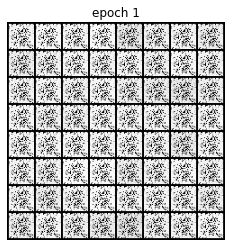

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.27it/s]

Epoch 1 of 100
Generator loss: 0.05779415, Discriminator loss: 0.08067723


118it [00:10, 10.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.24it/s]

Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.06it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.18it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.17it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


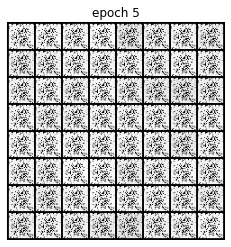

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.28it/s]

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.09it/s]                                                                                               
  0%|                                                                                          | 0/117 [00:00<?, ?it/s]

Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.28it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.32it/s]

Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.18it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.89it/s]

Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.20it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.71it/s]

Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.20it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


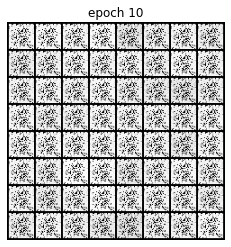

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.12it/s]

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.18it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.19it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.24it/s]                                                                                               
  2%|█▍                                                                                | 2/117 [00:00<00:12,  9.33it/s]

Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.14it/s]                                                                                               
  2%|█▍                                                                                | 2/117 [00:00<00:10, 10.47it/s]

Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.19it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


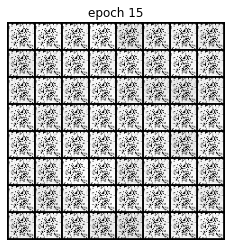

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.10it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.17it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.84it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.09it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.84it/s]

Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.12it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


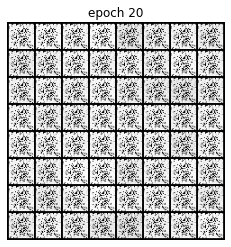

  2%|█▍                                                                                | 2/117 [00:00<00:12,  9.42it/s]

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.16it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.04it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.00it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.03it/s]

Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.99it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.76it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


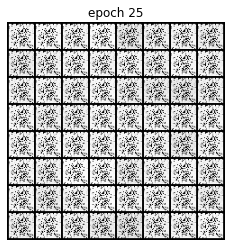

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.00it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.96it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.99it/s]

Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.90it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.37it/s]

Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.95it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.83it/s]

Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.76it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


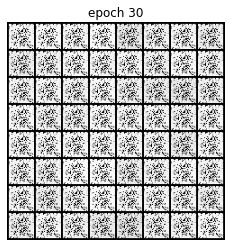

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.53it/s]

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.85it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.83it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.89it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.75it/s]

Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.86it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.02it/s]

Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.93it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


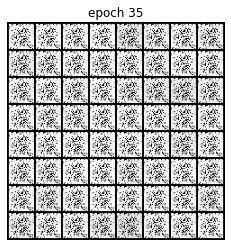

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.95it/s]

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.82it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.10it/s]

Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.56it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.72it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.43it/s]

Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.71it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


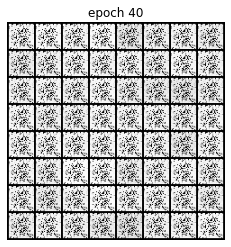

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.77it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.35it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.63it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.28it/s]

Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.68it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.07it/s]

Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.65it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


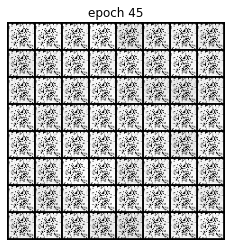

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.51it/s]

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.58it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.10it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.53it/s]

Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.34it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.87it/s]

Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.37it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.54it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


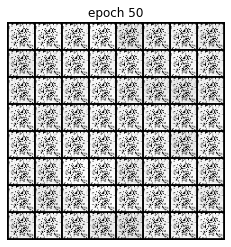

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.49it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.65it/s]

Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.39it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.12it/s]

Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.60it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.46it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


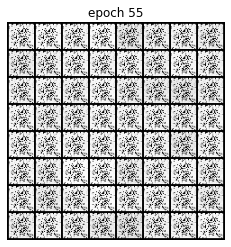

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.32it/s]

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.48it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.33it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.86it/s]

Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.32it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.22it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.09it/s]

Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.38it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


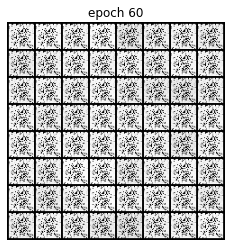

  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.06it/s]

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.23it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.80it/s]

Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.17it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.35it/s]

Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.39it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.23it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.54it/s]

Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.13it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


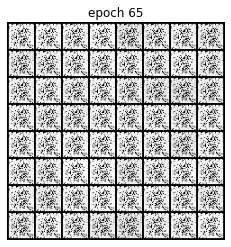

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.06it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.48it/s]

Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.98it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.26it/s]

Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.35it/s]

Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.01it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.43it/s]

Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


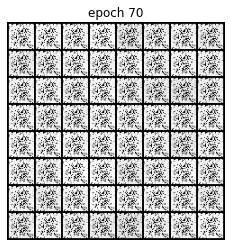

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.61it/s]

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.13it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.06it/s]

Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:17,  6.64it/s]

Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.01it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.60it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.97it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


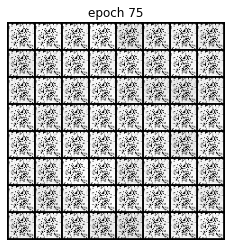

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.99it/s]

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.04it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.27it/s]

Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.55it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.92it/s]

Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.07it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.15it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:17,  6.68it/s]

Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


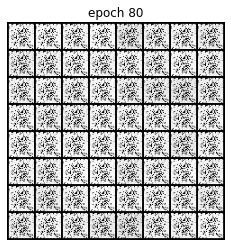

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.68it/s]

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.19it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.37it/s]

Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.08it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.39it/s]

Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.79it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.37it/s]

Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.87it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.81it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


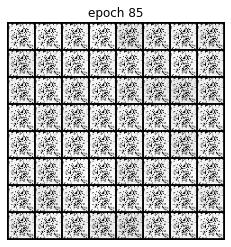

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.60it/s]

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.04it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.46it/s]

Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.22it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.06it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.32it/s]

Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.16it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.10it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


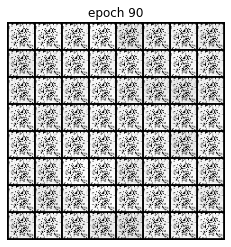

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.83it/s]

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.06it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.96it/s]

Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.94it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.54it/s]

Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.99it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.71it/s]

Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.11it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.83it/s]

Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.46it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


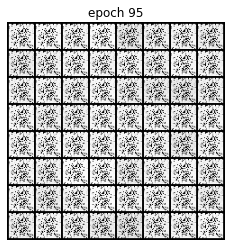

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.48it/s]

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.13it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.57it/s]

Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.97it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.37it/s]

Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.95it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.24it/s]

Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.08it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.05it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


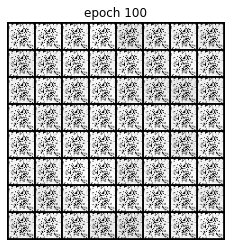

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [80]:
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        image, _ = data
        image = image.to(device)
        b_size = len(image)
            
        # run discriminator for  steps
        for step in range(k):
            fakes = generator(create_noise(b_size, nz)).detach()
            reals = image
            
            # train discriminator
            #loss_d += train_discriminator(optim_d, data_real, data_fake)
            
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            
            optim_d.zero_grad()
            
            output_real = discriminator(reals)
            loss_real = criterion(output_real, real_label)
            
            output_fake = discriminator(fakes)
            loss_fake = criterion(output_fake, fake_label)
            
            loss_real.backward()
            loss_fake.backward()
            
            optim_d.step()
            
            loss_d += loss_real + loss_fake
        
        data_fake = generator(create_noise(b_size, nz))
        # train generator
        
        output = discriminator(fakes)
        
        optim_g.zero_grad()
        
        output = discriminator(data_fake)
        loss_g_current = criterion(1-output, real_label)
        loss_g_current.backward()
        
        optim_g.step()
        
        loss_g += loss_g_current
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [81]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

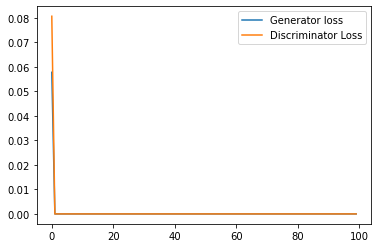

In [82]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/lossYG1b.png')

# Answer 1c

In [108]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [109]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

In [110]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [111]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): Linear(in_features=1024, out_features=784, bias=True)
    (10): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias

In [112]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

118it [00:10, 10.94it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


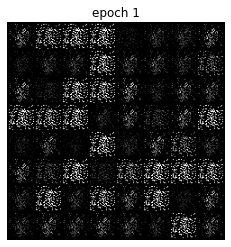

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 1 of 100
Generator loss: 6.02855206, Discriminator loss: 0.49135366


118it [00:10, 10.96it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 2 of 100
Generator loss: 8.81755161, Discriminator loss: 0.15695363


118it [00:10, 10.95it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 3 of 100
Generator loss: 10.93238926, Discriminator loss: 0.14043804


118it [00:10, 11.05it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.47it/s]

Epoch 4 of 100
Generator loss: 9.42025280, Discriminator loss: 0.14256711


118it [00:10, 11.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


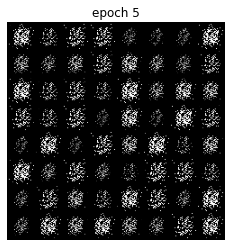

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.50it/s]

Epoch 5 of 100
Generator loss: 10.53842831, Discriminator loss: 0.16778345


118it [00:10, 10.94it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 6 of 100
Generator loss: 10.55947781, Discriminator loss: 0.12572762


118it [00:10, 11.01it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 7 of 100
Generator loss: 9.52497959, Discriminator loss: 0.22185135


118it [00:10, 10.99it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:11,  9.69it/s]

Epoch 8 of 100
Generator loss: 10.11852646, Discriminator loss: 0.13246758


118it [00:10, 10.89it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 9 of 100
Generator loss: 11.30002499, Discriminator loss: 0.08481283


118it [00:11, 10.66it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


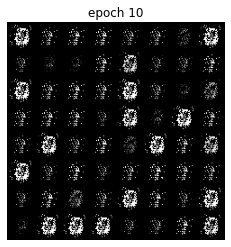

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.23it/s]

Epoch 10 of 100
Generator loss: 10.12162590, Discriminator loss: 0.04873028


118it [00:10, 10.84it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 11 of 100
Generator loss: 10.66712284, Discriminator loss: 0.04992416


118it [00:10, 10.98it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 12 of 100
Generator loss: 10.44788170, Discriminator loss: 0.03681500


118it [00:10, 10.98it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 13 of 100
Generator loss: 10.20092297, Discriminator loss: 0.05477897


118it [00:10, 10.96it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 14 of 100
Generator loss: 9.99277973, Discriminator loss: 0.06949137


118it [00:10, 11.03it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


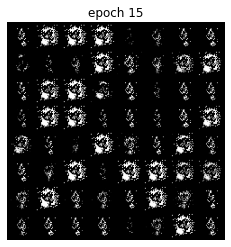

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 15 of 100
Generator loss: 10.53920460, Discriminator loss: 0.06218932


118it [00:10, 10.96it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 16 of 100
Generator loss: 11.51788235, Discriminator loss: 0.05569801


118it [00:10, 10.97it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 17 of 100
Generator loss: 9.49552917, Discriminator loss: 0.08715919


118it [00:10, 10.97it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 18 of 100
Generator loss: 9.70186615, Discriminator loss: 0.09240619


118it [00:10, 11.04it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.61it/s]

Epoch 19 of 100
Generator loss: 8.93684673, Discriminator loss: 0.09091020


118it [00:10, 10.93it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


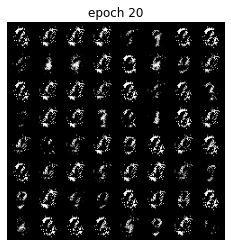

  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 20 of 100
Generator loss: 8.40462494, Discriminator loss: 0.11140864


118it [00:10, 10.85it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.99it/s]

Epoch 21 of 100
Generator loss: 8.76025772, Discriminator loss: 0.09431999


118it [00:11, 10.60it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.46it/s]

Epoch 22 of 100
Generator loss: 8.86000347, Discriminator loss: 0.08504287


118it [00:11, 10.67it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.86it/s]

Epoch 23 of 100
Generator loss: 8.59953976, Discriminator loss: 0.11098223


118it [00:11, 10.40it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.31it/s]

Epoch 24 of 100
Generator loss: 7.72665024, Discriminator loss: 0.14908125


118it [00:11, 10.71it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


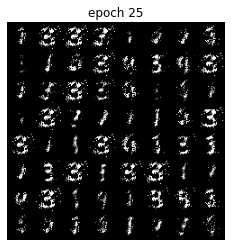

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 25 of 100
Generator loss: 7.66438818, Discriminator loss: 0.12889136


118it [00:10, 10.82it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 26 of 100
Generator loss: 7.19803286, Discriminator loss: 0.17917141


118it [00:10, 10.97it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 27 of 100
Generator loss: 6.58516121, Discriminator loss: 0.17854042


118it [00:10, 10.90it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.32it/s]

Epoch 28 of 100
Generator loss: 6.28303671, Discriminator loss: 0.23210673


118it [00:11, 10.59it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.54it/s]

Epoch 29 of 100
Generator loss: 6.01746178, Discriminator loss: 0.20934774


118it [00:10, 10.90it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


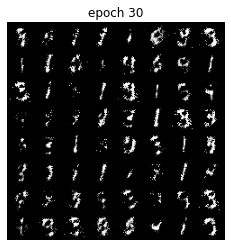

  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.20it/s]

Epoch 30 of 100
Generator loss: 5.84642267, Discriminator loss: 0.21775195


118it [00:10, 10.84it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.91it/s]

Epoch 31 of 100
Generator loss: 5.80455685, Discriminator loss: 0.20844704


118it [00:10, 10.94it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 32 of 100
Generator loss: 5.42047548, Discriminator loss: 0.25791785


118it [00:10, 10.82it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 33 of 100
Generator loss: 5.14582777, Discriminator loss: 0.28605074


118it [00:10, 10.80it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 34 of 100
Generator loss: 5.17928076, Discriminator loss: 0.27628028


118it [00:11, 10.70it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


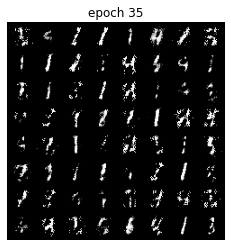

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.72it/s]

Epoch 35 of 100
Generator loss: 5.10386658, Discriminator loss: 0.27175286


118it [00:11, 10.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.16it/s]

Epoch 36 of 100
Generator loss: 4.71606302, Discriminator loss: 0.29027852


118it [00:11, 10.35it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.53it/s]

Epoch 37 of 100
Generator loss: 4.44330502, Discriminator loss: 0.27692434


118it [00:11, 10.60it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.39it/s]

Epoch 38 of 100
Generator loss: 4.07739401, Discriminator loss: 0.30628374


118it [00:11, 10.72it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.64it/s]

Epoch 39 of 100
Generator loss: 3.91628504, Discriminator loss: 0.32536533


118it [00:10, 10.77it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


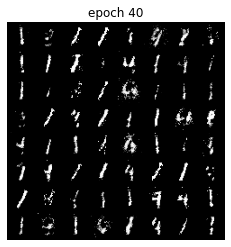

  1%|▋                                                                                 | 1/117 [00:00<00:16,  7.08it/s]

Epoch 40 of 100
Generator loss: 3.84547830, Discriminator loss: 0.32414651


118it [00:10, 10.74it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.16it/s]

Epoch 41 of 100
Generator loss: 3.68508554, Discriminator loss: 0.33583161


118it [00:11, 10.48it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 42 of 100
Generator loss: 3.72359133, Discriminator loss: 0.32057673


118it [00:10, 10.87it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.09it/s]

Epoch 43 of 100
Generator loss: 3.94722557, Discriminator loss: 0.32404101


118it [00:11, 10.47it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.28it/s]

Epoch 44 of 100
Generator loss: 3.72164655, Discriminator loss: 0.36342829


118it [00:11, 10.63it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


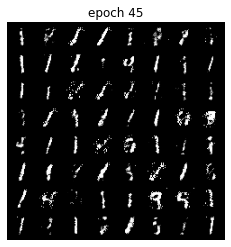

  1%|▋                                                                                 | 1/117 [00:00<00:12,  8.95it/s]

Epoch 45 of 100
Generator loss: 3.55005598, Discriminator loss: 0.37561294


118it [00:11, 10.60it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.09it/s]

Epoch 46 of 100
Generator loss: 3.43376637, Discriminator loss: 0.39705816


118it [00:11, 10.37it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.77it/s]

Epoch 47 of 100
Generator loss: 3.43290401, Discriminator loss: 0.39063019


118it [00:11, 10.65it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.43it/s]

Epoch 48 of 100
Generator loss: 3.57236385, Discriminator loss: 0.38582516


118it [00:11, 10.56it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.33it/s]

Epoch 49 of 100
Generator loss: 3.72452402, Discriminator loss: 0.36929637


118it [00:11, 10.48it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


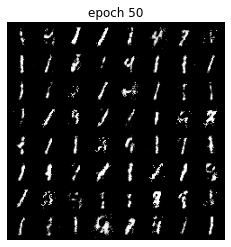

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.45it/s]

Epoch 50 of 100
Generator loss: 3.57769608, Discriminator loss: 0.39612290


118it [00:11, 10.53it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.83it/s]

Epoch 51 of 100
Generator loss: 3.35460997, Discriminator loss: 0.40728053


118it [00:11, 10.43it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.83it/s]

Epoch 52 of 100
Generator loss: 3.34051180, Discriminator loss: 0.40261379


118it [00:11, 10.49it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 53 of 100
Generator loss: 3.30462027, Discriminator loss: 0.40133741


118it [00:11, 10.43it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.91it/s]

Epoch 54 of 100
Generator loss: 3.18103790, Discriminator loss: 0.40719050


118it [00:11, 10.45it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


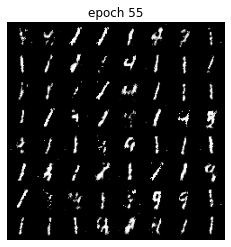

  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.12it/s]

Epoch 55 of 100
Generator loss: 3.22811556, Discriminator loss: 0.41308993


118it [00:11, 10.40it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:18,  6.39it/s]

Epoch 56 of 100
Generator loss: 3.11499143, Discriminator loss: 0.43182388


118it [00:11, 10.33it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.46it/s]

Epoch 57 of 100
Generator loss: 3.20111990, Discriminator loss: 0.43697092


118it [00:11, 10.23it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.90it/s]

Epoch 58 of 100
Generator loss: 3.31461811, Discriminator loss: 0.43117121


118it [00:11, 10.23it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.68it/s]

Epoch 59 of 100
Generator loss: 3.16510606, Discriminator loss: 0.42309296


118it [00:11, 10.35it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


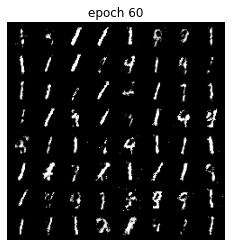

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.71it/s]

Epoch 60 of 100
Generator loss: 3.09334588, Discriminator loss: 0.43896660


118it [00:11, 10.39it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.37it/s]

Epoch 61 of 100
Generator loss: 2.98306274, Discriminator loss: 0.46052140


118it [00:11, 10.33it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.42it/s]

Epoch 62 of 100
Generator loss: 3.16318297, Discriminator loss: 0.45677745


118it [00:11, 10.29it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.57it/s]

Epoch 63 of 100
Generator loss: 3.06484532, Discriminator loss: 0.48923874


118it [00:11, 10.40it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.34it/s]

Epoch 64 of 100
Generator loss: 2.94582033, Discriminator loss: 0.49422601


118it [00:11, 10.27it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


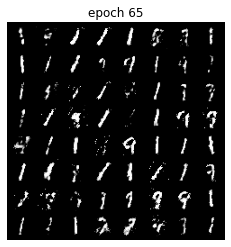

  1%|▋                                                                                 | 1/117 [00:00<00:17,  6.62it/s]

Epoch 65 of 100
Generator loss: 2.86699581, Discriminator loss: 0.49328133


118it [00:12,  9.78it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 66 of 100
Generator loss: 2.92240930, Discriminator loss: 0.49945247


118it [00:11, 10.31it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.20it/s]

Epoch 67 of 100
Generator loss: 2.88861918, Discriminator loss: 0.52063745


118it [00:11, 10.28it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 68 of 100
Generator loss: 2.82593083, Discriminator loss: 0.51245999


118it [00:11, 10.29it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 69 of 100
Generator loss: 2.70889735, Discriminator loss: 0.52626121


118it [00:11, 10.24it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


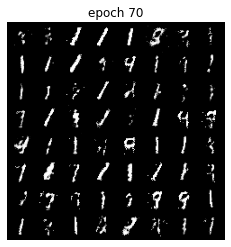

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.86it/s]

Epoch 70 of 100
Generator loss: 2.79566860, Discriminator loss: 0.51397085


118it [00:11, 10.23it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.18it/s]

Epoch 71 of 100
Generator loss: 2.76742172, Discriminator loss: 0.53492457


118it [00:11, 10.26it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.18it/s]

Epoch 72 of 100
Generator loss: 2.72975349, Discriminator loss: 0.53307813


118it [00:11, 10.17it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 73 of 100
Generator loss: 2.67679310, Discriminator loss: 0.54885149


118it [00:11, 10.20it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.68it/s]

Epoch 74 of 100
Generator loss: 2.66149831, Discriminator loss: 0.53819531


118it [00:11, 10.15it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


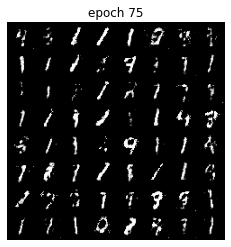

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.54it/s]

Epoch 75 of 100
Generator loss: 2.65383148, Discriminator loss: 0.57433444


118it [00:11, 10.11it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.36it/s]

Epoch 76 of 100
Generator loss: 2.63114762, Discriminator loss: 0.56957608


118it [00:11,  9.99it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.50it/s]

Epoch 77 of 100
Generator loss: 2.57191920, Discriminator loss: 0.57195747


118it [00:11, 10.05it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.71it/s]

Epoch 78 of 100
Generator loss: 2.71334672, Discriminator loss: 0.57962489


118it [00:11, 10.02it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.34it/s]

Epoch 79 of 100
Generator loss: 2.69035029, Discriminator loss: 0.59079492


118it [00:11,  9.99it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


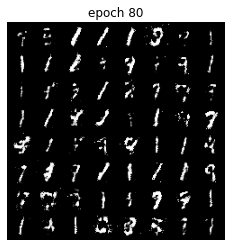

  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.74it/s]

Epoch 80 of 100
Generator loss: 2.59570003, Discriminator loss: 0.59500420


118it [00:11, 10.02it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:12,  9.12it/s]

Epoch 81 of 100
Generator loss: 2.63894463, Discriminator loss: 0.59463114


118it [00:11,  9.92it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.02it/s]

Epoch 82 of 100
Generator loss: 2.45850658, Discriminator loss: 0.60649586


118it [00:11,  9.92it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.72it/s]

Epoch 83 of 100
Generator loss: 2.41557145, Discriminator loss: 0.62319130


118it [00:11,  9.92it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.65it/s]

Epoch 84 of 100
Generator loss: 2.40680838, Discriminator loss: 0.61769259


118it [00:12,  9.59it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


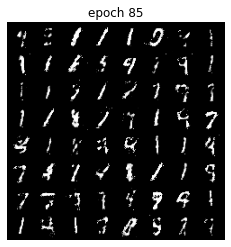

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.34it/s]

Epoch 85 of 100
Generator loss: 2.43274879, Discriminator loss: 0.62020057


118it [00:12,  9.41it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:18,  6.37it/s]

Epoch 86 of 100
Generator loss: 2.44123816, Discriminator loss: 0.62639511


118it [00:12,  9.46it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 87 of 100
Generator loss: 2.38751292, Discriminator loss: 0.63724995


118it [00:12,  9.83it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.35it/s]

Epoch 88 of 100
Generator loss: 2.40042257, Discriminator loss: 0.63137531


118it [00:12,  9.76it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.22it/s]

Epoch 89 of 100
Generator loss: 2.42149329, Discriminator loss: 0.63295180


118it [00:12,  9.73it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


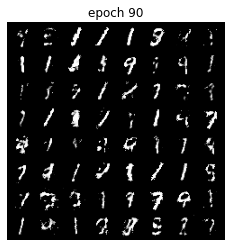

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.48it/s]

Epoch 90 of 100
Generator loss: 2.38211751, Discriminator loss: 0.62093931


118it [00:12,  9.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:13,  8.29it/s]

Epoch 91 of 100
Generator loss: 2.35017705, Discriminator loss: 0.63842297


118it [00:12,  9.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.15it/s]

Epoch 92 of 100
Generator loss: 2.33025885, Discriminator loss: 0.64698678


118it [00:12,  9.71it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.60it/s]

Epoch 93 of 100
Generator loss: 2.43471122, Discriminator loss: 0.63021654


118it [00:12,  9.70it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.48it/s]

Epoch 94 of 100
Generator loss: 2.33564854, Discriminator loss: 0.65250993


118it [00:12,  9.70it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


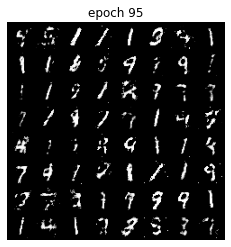

  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.40it/s]

Epoch 95 of 100
Generator loss: 2.25445127, Discriminator loss: 0.67436224


118it [00:12,  9.72it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.54it/s]

Epoch 96 of 100
Generator loss: 2.31970692, Discriminator loss: 0.67633450


118it [00:12,  9.77it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:15,  7.48it/s]

Epoch 97 of 100
Generator loss: 2.23900223, Discriminator loss: 0.70088285


118it [00:12,  9.71it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  7.93it/s]

Epoch 98 of 100
Generator loss: 2.18678355, Discriminator loss: 0.70609778


118it [00:12,  9.73it/s]                                                                                               
  1%|▋                                                                                 | 1/117 [00:00<00:14,  8.02it/s]

Epoch 99 of 100
Generator loss: 2.11464262, Discriminator loss: 0.71935028


118it [00:12,  9.74it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


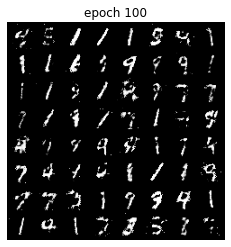

Epoch 100 of 100
Generator loss: 2.25314569, Discriminator loss: 0.69407052


In [113]:
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 

        image, _ = data
        image = image.to(device)
        b_size = len(image)
            
        # run discriminator for  steps
        for step in range(k):
            fakes = generator(create_noise(b_size, nz)).detach()
            reals = image
            
            # train discriminator
            #loss_d += train_discriminator(optim_d, data_real, data_fake)
            
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            
            optim_d.zero_grad()
            
            output_real = discriminator(reals)
            loss_real = criterion(output_real, real_label)
            
            output_fake = discriminator(fakes)
            loss_fake = criterion(output_fake, fake_label)
            
            loss_real.backward()
            loss_fake.backward()
            
            optim_d.step()
            
            loss_d += loss_real + loss_fake
        
        data_fake = generator(create_noise(b_size, nz))
        # train generator
        
        output = discriminator(fakes)
        
        optim_g.zero_grad()
        
        output = discriminator(data_fake)
        loss_g_current = criterion(output, real_label)
        loss_g_current.backward()
        
        optim_g.step()
        
        loss_g += loss_g_current
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")